# 加载模型，并导入英语推文数据，然后使用模型

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir(r'D:\dataset\clear_data')

In [3]:
#Read the CSV file
tweet_english_negative = pd.read_csv('tweet_english_negative.csv')
tweet_english_negative.head()

,tweet_id,text,word,text_tag,tweet,user_location,sentiment
0,1215055917747585024,indeed remarkable like remarkable example offi...,"['indeed', 'remarkable', 'like', 'remarkable',...","[('indeed', 'RB'), ('remarkable', 'JJ'), ('lik...","This is indeed remarkable, just like it's a re...",United States,-1.0
1,1215055918045548544,msnbc truly pathetic fake news medium outlet h...,"['msnbc', 'truly', 'pathetic', 'fake', 'news',...","[('msnbc', 'NN'), ('truly', 'RB'), ('pathetic'...",RT @Jamierodr14: WOW! \n\nMSNBC is truly Pathe...,United States,-2.0
2,1215055921254227969,shot dark fizzle iran propaganda statement roc...,"['shot', 'dark', 'fizzle', 'iran', 'propaganda...","[('shot', 'NN'), ('dark', 'NN'), ('fizzle', 'N...",RT @thro_e: 😬 WHEN SHOTS IN THE DARK FIZZLE 😬\...,"Nashua, NH",-2.0
3,1215055917227495424,fact checking trump address iran attack trump ...,"['fact', 'checking', 'trump', 'address', 'iran...","[('fact', 'NN'), ('checking', 'VBG'), ('trump'...",Fact-checking Trump’s address on the Iran atta...,NaN,-3.0
4,1215055915520491520,iran claim killed american pentagon said zero ...,"['iran', 'claim', 'killed', 'american', 'penta...","[('iran', 'NN'), ('claim', 'NN'), ('killed', '...","RT @sxdoc: Iran claims it killed 30 Americans,...",UK,-2.0


# 通过机器学习算法，进行第二次分类。并查看分类结果的表现。

In [4]:
from sklearn.externals import joblib
# 加载svm.pkl
new_rf= joblib.load('Rf_pipe.pkl')
# print new_svm.predict(X[0:1])

C:\Users\REGGIE\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [5]:
# tweet_english_negative['label'] = .apply(new_rf.predict)
x = tweet_english_negative.text_tag
tweet_english_negative['label'] = new_rf.predict(x)

In [6]:
tweet_english_negative.label.value_counts()

0.0    661389
1.0     89263
Name: label, dtype: int64

In [8]:
tweet_english_negative.sentiment.value_counts()

-1.0    514503
-2.0    153576
-3.0     77023
-4.0      5550
Name: sentiment, dtype: int64

In [9]:
sentiment_label = tweet_english_negative[['label','sentiment']]

In [10]:
not_bad = tweet_english_negative[(tweet_english_negative.label == 0)]

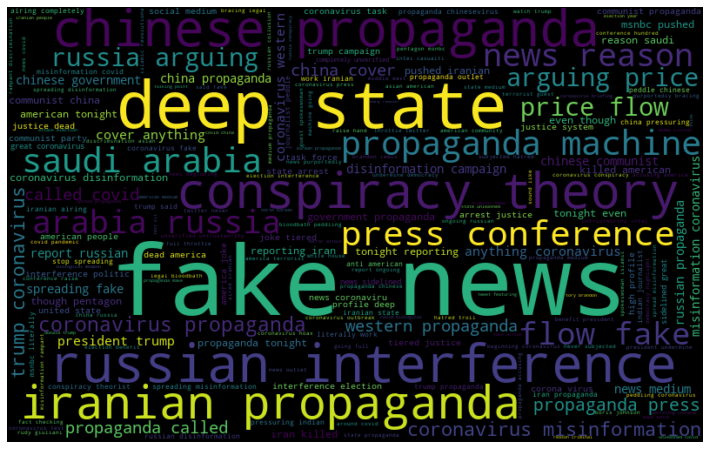

In [11]:
all_words = ' '.join([text for text in not_bad['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
keyword = ['fake news','conspiracy theory']
pattern = '|'.join(keyword)
keyword_not_bad = tweet_english_negative[tweet_english_negative.text.str.contains(pattern, case=False)]

In [16]:
pd.options.display.max_colwidth = 100
# reference
reference = keyword_not_bad[['tweet_id','tweet']].reset_index(drop = True)

for i in reference.tweet[-400:-250]:
    print(i)
    print('------------------------')

RT @ScottAdamsSays: The following have blatantly lied to us this month during a pandemic: CDC, WHO, China, Surgeon General, Fake News. #Cor…
------------------------
RT @BENSONDEENA: MSM lies yet again!! Showing a photo from a 2017 MOVIE, saying it's COVID 19 in Italy.  FAKE NEWS!!  #qanon https://t.co/d…
------------------------
@Francescovotta1 @olliecarroll Thank you, Francesco. I am not Russian, but was moved by Putin's, respectively his nation's generosity and I am totally disgusted by this vile, anti-Russian piece of fake news.
------------------------
RT @mmfa: Tucker Carlson cites report he admits he hasn’t confirmed as true to spread conspiracy theory that coronavirus started in a Chine…
------------------------
RT @mmfa: Tucker Carlson cites report he admits he hasn’t confirmed as true to spread conspiracy theory that coronavirus started in a Chine…
------------------------
Fake News @CNN didn't show President Trump's Coronavirus briefing at the White House live today, and I 

# According to the above classification results, most of the tweets are classified as normal tweets. But by looking at the word cloud and looking at the details of some tweets, found that these tweets are also offensive and rumors. So this machine learning method is not suitable for use in this situation. Only use the method of emotional dictionary matching to filter negative tweets, and then conduct in-depth analysis.

In [22]:
keyword = ['And France 24 has an article that China has lied and continues to lie about the fatalities but gullible Canadians believe your constant lies including peddling your conspiracy theories by your agents and trolls you pay in Canada and elsewhere around the world.',
           'China virus is bad, President Trump is doing a fabulous job much to dem, fake news, deep state despair. President Trump is a true leader',
          'Watch out for fake news- 5G &amp; coronavirus: 5G is a technology issue and Covid is a virus.',
          ' Fake news. Lots of countries are very unhappy with China.',
          'China Virus',
          'Please wake up, China already started the 3rd world war. Huge damage to US and act as saver to Europe.',
           'BREXIT =World War 3']
pattern = '|'.join(keyword)
sample = reference[reference.tweet.str.contains(pattern, case=False)]

sample

,tweet_id,tweet
10585,1215105644224606211,CRIMINALI FAKE NEWS\n\nBREXIT \n\nIts called getting rid off drift wood \n\nBeing in the EU ties...
50413,1236765231239569410,@NetworksManager Keep spreading your China virus...you are fake news
59345,1237084676642267137,"Before US was infected:\n\n""CHINA VIRUS IS A BIOWEAPON""\n\n""Its just the flu stop believing cons..."
62823,1237050681736998913,RT @DaveEverlasting: @realDonaldTrump #FakeNewsMedia trying to panic America over the China Viru...
63424,1237048102164377600,RT @DaveEverlasting: @realDonaldTrump #FakeNewsMedia trying to panic America over the China Viru...
...,...,...
174708,1245142448352849921,RT @BardsOfWar: Apparently China Virus hates FAKE news. 👀
174711,1245142436524982272,RT @DrZweliMkhize: Watch out for fake news- 5G &amp; coronavirus: 5G is a technology issue and C...
174755,1245140563273416705,RT @DrZweliMkhize: Watch out for fake news- 5G &amp; coronavirus: 5G is a technology issue and C...
174766,1245140184234184706,"China virus is bad, President Trump is doing a fabulous job much to dem, fake news, deep state d..."


# According to some specific examples mentioned above, it can be found that there are a lot of fake news, offensive statements or rumors in the category of 0, which further illustrates the poor performance of the machine learning algorithm in this situation.